# 图像基础

## 2.1 二值图、灰度图、彩色图

- 二值图
    - 只有两种取值
- 灰度图
    - 对8位灰度图，有256种取值
- 彩色图（RGB)
    - 真彩色：RGB通道各有8位
    - 假彩色：8位表示256种颜色
    


## 2.2 图像的矩阵表示

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

In [15]:
def show(img):
    if img.ndim==2:
        plt.imshow(img,cmap="gray")
    else:
        plt.imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB))
    plt.show()

### 图象基础

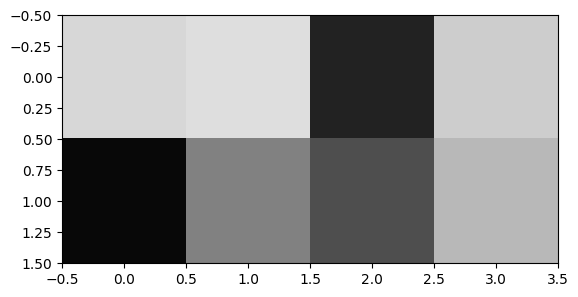

(array([[215, 222,  34, 205],
        [  8, 129,  78, 184]], dtype=uint8),
 None)

In [8]:
#两通道 即灰度图
A = np.random.randint(0,256,(2,4),dtype=np.uint8)
A,show(A)

B的维度: 3
[[[ 10 147   7]
  [ 87 234  64]
  [115 143 123]
  [134  65  67]]

 [[119  43  57]
  [148 124 181]
  [238 249 192]
  [ 30  29 179]]]


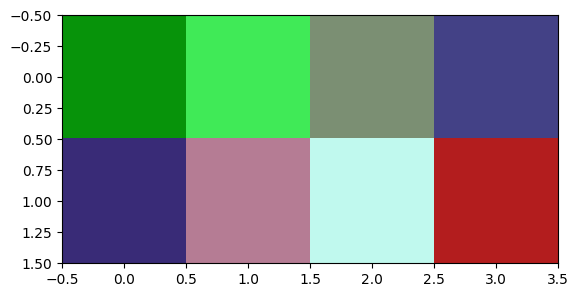

C的维度: 3
[[[100 141 128  49]
  [109  37 127  21]]

 [[253  94 228 215]
  [  4 135  20 110]]

 [[ 33 236 176 169]
  [226 196 210  19]]]


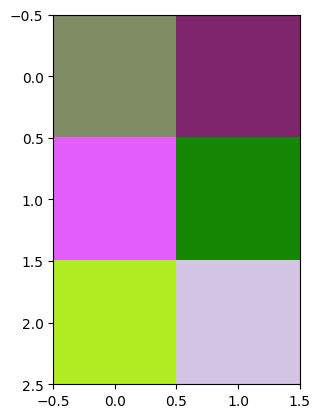

In [37]:
#三通道 即彩色图
B = np.random.randint(0,256,(2,4,3),dtype=np.uint8)
print("B的维度:",B.ndim)
print(B)
show(B)

C = np.random.randint(0,256,(3,2,4),dtype=np.uint8)
print("C的维度:",C.ndim)
print(C)
show(C)

In [10]:
np.uint8([-1,0,10,255,300]) #不在0-255之间的数会映射到0-255

array([255,   0,  10, 255,  44], dtype=uint8)

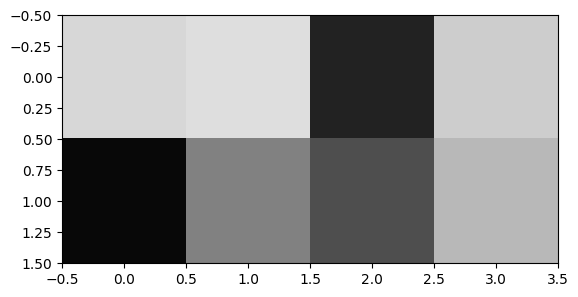

(array([[215., 222.,  34., 205.],
        [  8., 129.,  78., 184.]], dtype=float32),
 None)

In [11]:
A2 = np.float32(A)
A2,show(A2)

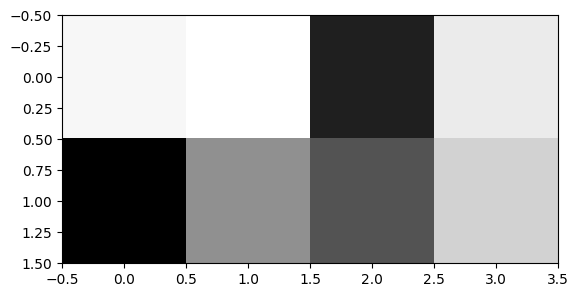

In [16]:
A2 /=255  #归一化
show(A2)

### 通道的分离和合并

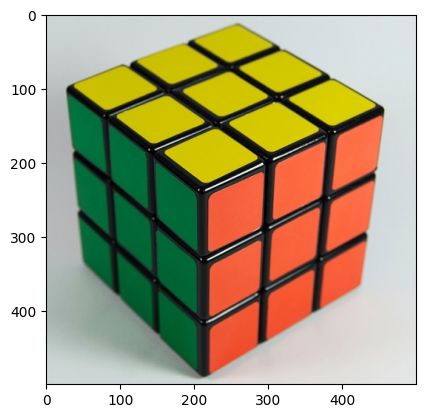

In [18]:
img = cv.imread("./pic/cubic500x500.jpg")
show(img)

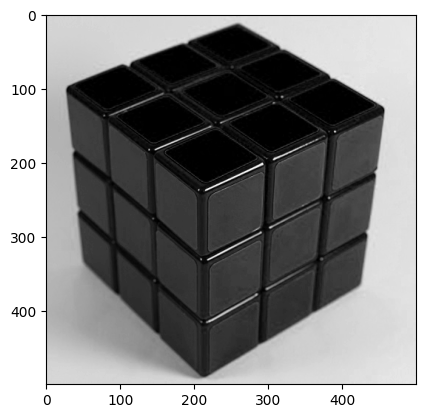

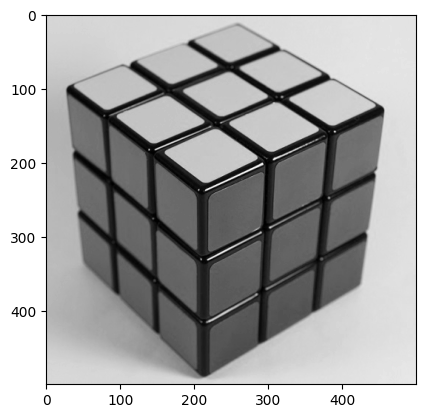

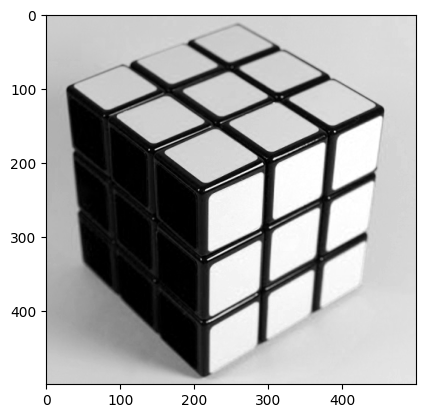

(None, None, None)

In [20]:
b,g,r = cv.split(img)
show(b),show(g),show(r)

In [21]:
img.shape

(500, 500, 3)

In [22]:
img.ndim

3

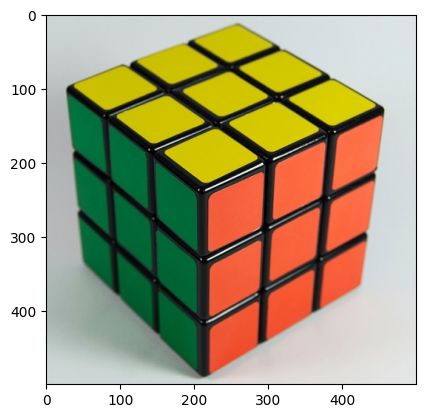

In [23]:
#图像合成
img2 = cv.merge([b,g,r])
show(img2)

### 彩色图转换为灰度图

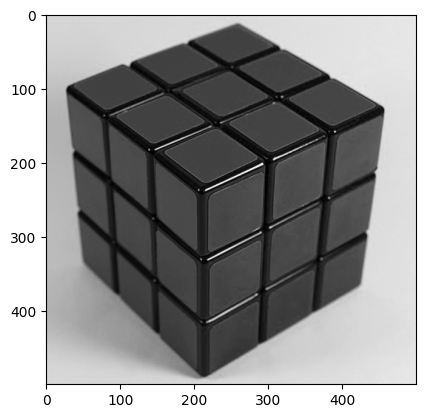

In [39]:
gray1 = 1/3*b+1/3*g+1/3*b
show(gray1)

In [40]:
gray2 = np.uint8(gray1)
gray2

array([[213, 213, 212, ..., 229, 229, 229],
       [212, 212, 212, ..., 229, 229, 228],
       [212, 212, 212, ..., 229, 229, 229],
       ...,
       [215, 215, 215, ..., 230, 230, 230],
       [215, 215, 215, ..., 230, 229, 229],
       [216, 215, 215, ..., 230, 229, 229]], dtype=uint8)

In [41]:
gray3 = gray1.astype(np.uint8)
gray3

array([[213, 213, 212, ..., 229, 229, 229],
       [212, 212, 212, ..., 229, 229, 228],
       [212, 212, 212, ..., 229, 229, 229],
       ...,
       [215, 215, 215, ..., 230, 230, 230],
       [215, 215, 215, ..., 230, 229, 229],
       [216, 215, 215, ..., 230, 229, 229]], dtype=uint8)

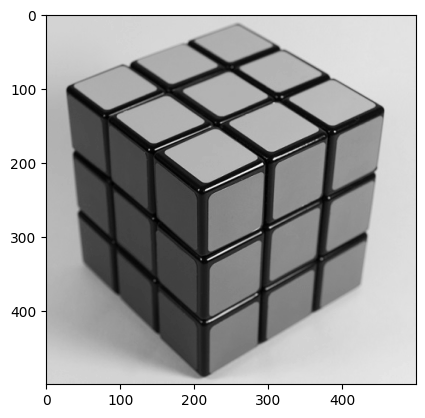

In [42]:
#使用官方推荐的比例
gray4 = 0.299*r+0.587*g+0.114*b
show(gray4)

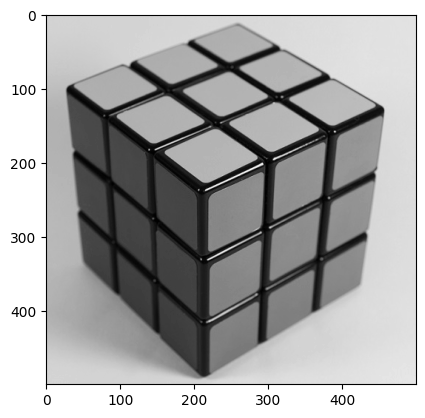

In [43]:
#使用函数
gray5 = cv.cvtColor(img,cv.COLOR_BGR2GRAY) #cvt:convert 
show(gray5)

### 图像二值化
- 把灰度图转化为二值图

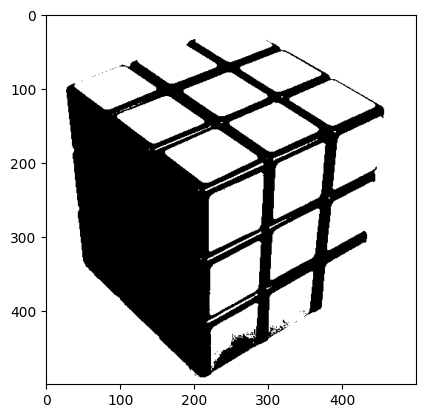

In [45]:
thresh = 125 #阈值
gray4[gray4>=thresh]=255
gray4[gray4<thresh]=0
show(gray4)

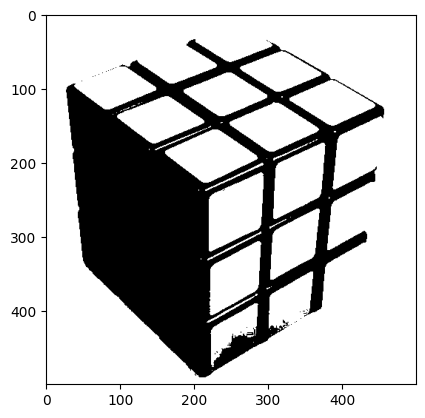

In [49]:
#官方接口 
_,img_bin = cv.threshold(gray5,125,255,cv.THRESH_BINARY) #255为>125时设为的值 cv.THRESH_BINARY可以简写为0
show(img_bin)

## 2.3 图像相加、相减

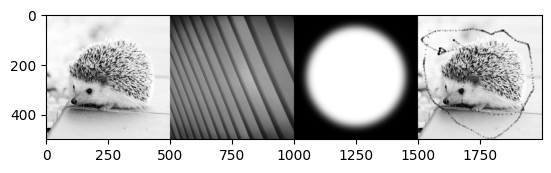

In [68]:
obj = cv.imread("pic/hedgehog500x500.jpg",0)
bg = cv.imread("pic/line500x500.jpg",0)
mask = cv.imread("pic/mask500x500.jpg",0)
noise = cv.imread("pic/hedgehog_noise_500x500.jpg",0)

show(np.hstack([obj,bg,mask,noise])) #使用np.hstack合并显示图片

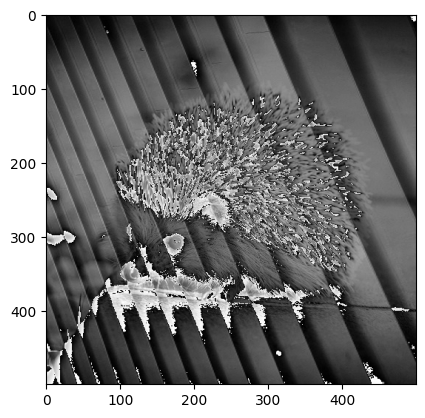

In [59]:
#相加
img_add = obj+bg
show(img_add)


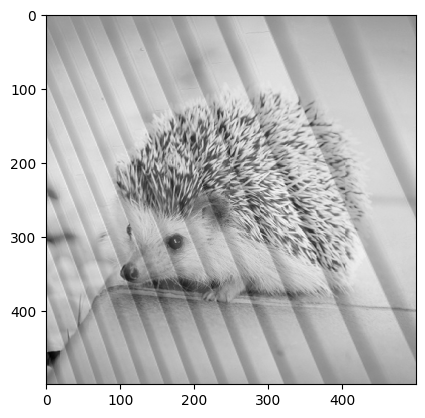

In [58]:
img_add2 = cv.add(obj*0.5,bg*0.5)
show(img_add2)

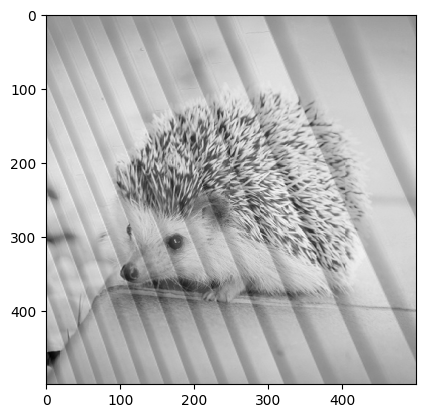

In [57]:
#使用函数cv.addWeighted
img_add3 = cv.addWeighted(obj,0.5,bg,0.5,0)
show(img_add3)

In [60]:
#cv.add vs cv.addWeighted
img_add2.dtype,img_add3.dtype #输出类型不同

(dtype('float64'), dtype('uint8'))

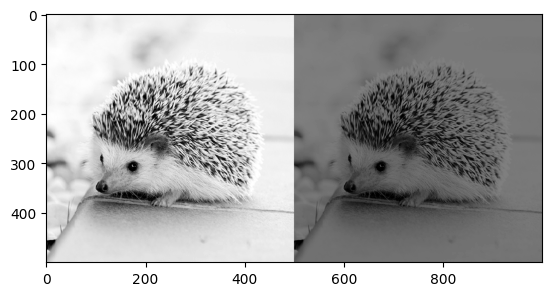

In [62]:
#减法
img_sub = (img_add2-bg*0.5)*2
#使用函数cv.subtract
img_sub2 = cv.subtract(img_add2,bg*0.5)#因为没有*2，所以更暗一点
show(np.hstack([img_sub,img_sub2]))

## 2.4 图像相乘、相除

In [69]:
#乘法
mask = mask/255 #归一化，因为mask需要在0-1之间
mask.max()

1.0

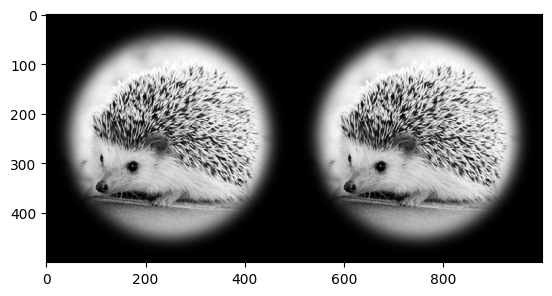

In [74]:
img_mul1 = obj*mask
img_mul2 = cv.multiply(obj*1.0,mask) #multiply()两个参数都为浮点型
show(np.hstack([img_mul1,img_mul2]))

In [76]:
noise.dtype

dtype('uint8')

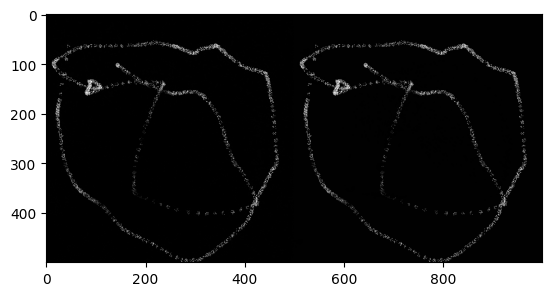

In [78]:
#除法 不常用
img_div1 = obj/(np.float64(noise)+1)
img_div2 = cv.divide(obj,noise+1)
show(np.hstack([img_div1,img_div2]))

## 2.5 图像线性和非线性变换

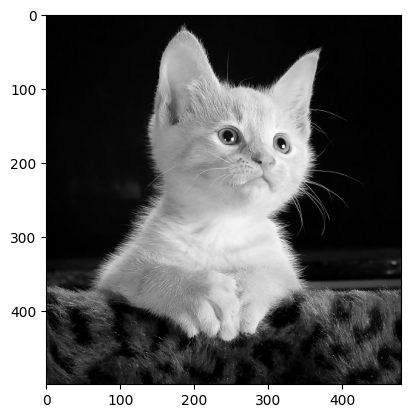

In [84]:
img = cv.imread("pic/cat500x480.jpg",0)
show(img)

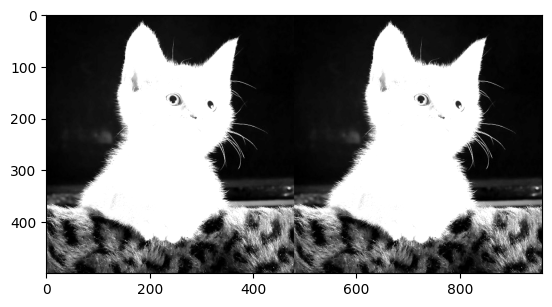

In [85]:
#线性变换
b = 20
k = 2
img2 = b+k*img.astype(np.int32)
img2 = np.clip(img2,0,255) #使每个元素的值在0-255之间
img3 = cv.convertScaleAbs(img,alpha=2,beta=20)
show(np.hstack([img2,img3]))

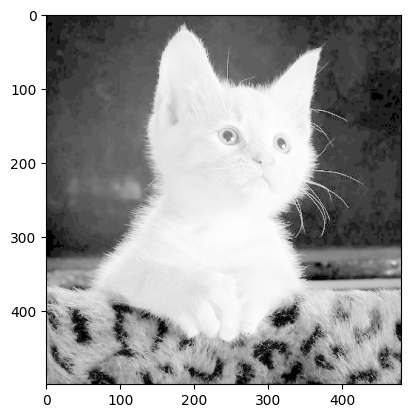

In [88]:
#非线性变换
img4 = 10+np.log(img.astype(np.float32)+1)/0.1
show(img4)

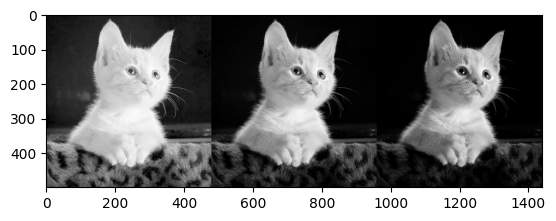

In [90]:
#gama变换
img01 = img/255 #归一化

img05 = np.power(img01,0.5)*255 #0.5更亮
img15 = np.power(img01,1.5)*255 #1.5更暗
show(np.hstack([img05,img,img15]))


## 2.6 实例：图像融合

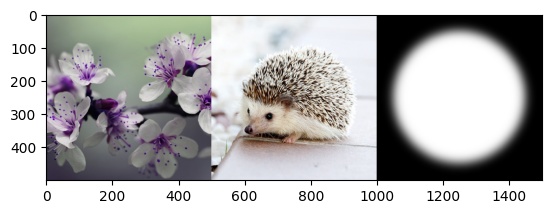

In [91]:
A = cv.imread("pic/petal500x500.jpg")
B = cv.imread("pic/hedgehog500x500.jpg")
M = cv.imread("pic/mask500x500.jpg")

show(np.hstack([A,B,M]))

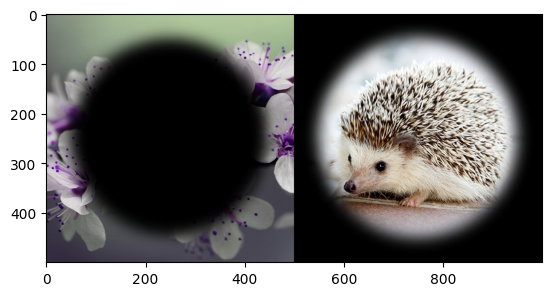

In [95]:
mask01 = M/255
petal = A*(1-mask01)
hedgehog = B*mask01
show(np.uint8(np.hstack([petal,hedgehog])))

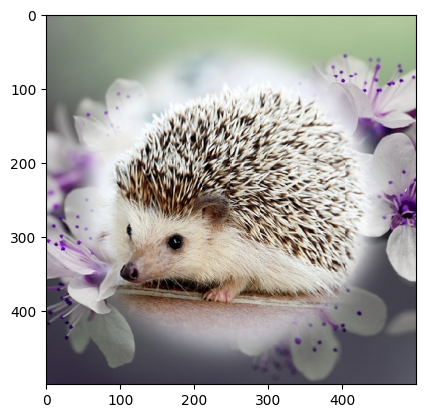

In [100]:
out = cv.addWeighted(petal,0.5,hedgehog,0.5,0)*2
show(np.uint8(out))

In [101]:
cv.imwrite("test/img_fusion.jpg",out)

True